In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [11]:
# The DataOperations class is used to read in data, process data, and visualize data
class DataOperations:
   
    def __init__(self,atr=None):
        '''
        The __init__ method is the constructor for a class. 
        
        :param atr: The attribute to be tested
        '''
        self.atr = atr

    def Process(self):
        '''
        The Process function takes in a file path, a pandas dataframe, or a numpy array and returns a
        pandas dataframe
        :return: A pandas dataframe
        '''
       
        if isinstance(self.atr,np.ndarray):
            self.df = pd.DataFrame(self.atr)
            return self.df

        elif isinstance(self.atr,str):
            name, ext = os.path.splitext(self.atr)
            if ext == ".csv":
                self.df = pd.read_csv(self.atr)
                return self.df
            elif ext == ".json":
                self.df = pd.read_json(self.atr) 
                return self.df 
            else:
                raise ValueError("Invalid file type")  

        elif isinstance(self.atr,pd.DataFrame):
            self.df = self.atr
            return self.df

        elif type(self.atr==type(None)):
            new_rnd_data = {"a":np.random.randn(10),
                            "b":np.random.randn(10),
                            "c":np.random.randn(10)}

            self.df = pd.DataFrame(new_rnd_data,columns=new_rnd_data.keys())
            return self.df 

    def descriptive_statistics(self):
        '''
        The function prints the dataframe info and then the dataframe description
        '''
        
        print(self.df.info())
        print("*************************")
        print(self.df.describe().T)
         
    def visualization(self):
        '''
        This function is used to visualize the data
        '''

        for col in self.df.columns:
            if self.df[col].dtypes != "O":
                fig,ax = plt.subplots(figsize=(12,6))
                ax.hist(self.df[col],facecolor="g", alpha=0.75)
                plt.xlabel(f" {col}")
                plt.ylabel("Count")
                plt.title(f"Histogram of {col}")
                plt.grid(True)
                plt.show()

### With numpy.array

In [12]:
op_1 = DataOperations(np.random.randn(10))
op_1.Process()

,0
0,0.823612
1,-1.469919
2,0.336173
3,0.603369
4,0.043020
5,-1.190447
6,1.338900
7,-0.080630
8,-0.761790
9,0.014936


In [13]:
op_1.descriptive_statistics()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10 non-null     float64
dtypes: float64(1)
memory usage: 208.0 bytes
None
*************************
   count      mean       std       min     25%       50%      75%     max
0   10.0 -0.034277  0.888384 -1.469919 -0.5915  0.028978  0.53657  1.3389


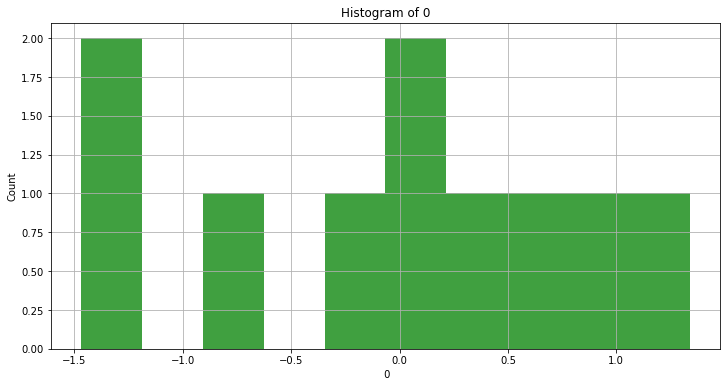

In [16]:
op_1.visualization()

### With path

In [6]:
op_2 = DataOperations("C:/Users/emirh/OneDrive/Belgeler/trial_dataset.csv")
op_2.Process()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
op_2.descriptive_statistics()

Variable: sepal_length, dtype: float64, count: 150, mean: 5.84, std: 0.83, min: 4.3, Q1: 5.1, median: 5.8, Q3: 6.4, max: 7.9
Variable: sepal_width, dtype: float64, count: 150, mean: 3.06, std: 0.44, min: 2.0, Q1: 2.8, median: 3.0, Q3: 3.3, max: 4.4
Variable: petal_length, dtype: float64, count: 150, mean: 3.76, std: 1.77, min: 1.0, Q1: 1.6, median: 4.35, Q3: 5.1, max: 6.9
Variable: petal_width, dtype: float64, count: 150, mean: 1.2, std: 0.76, min: 0.1, Q1: 0.3, median: 1.3, Q3: 1.8, max: 2.5
Variable: species, dtype: object, count: 150, number of unique: 3


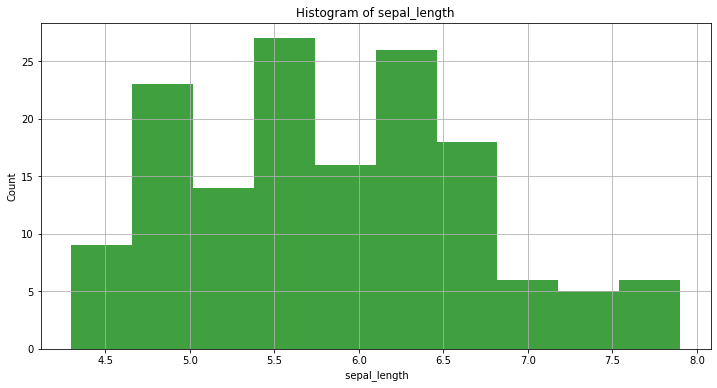

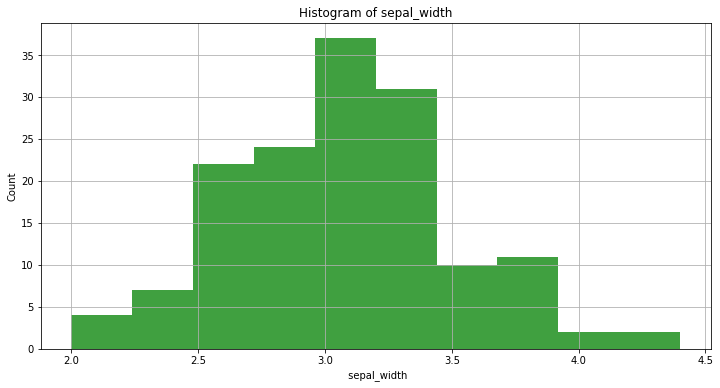

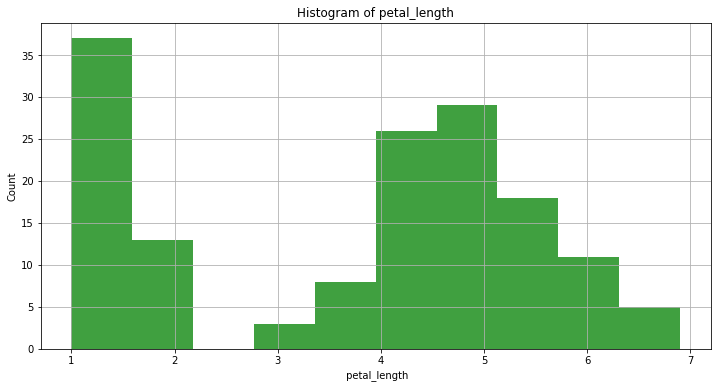

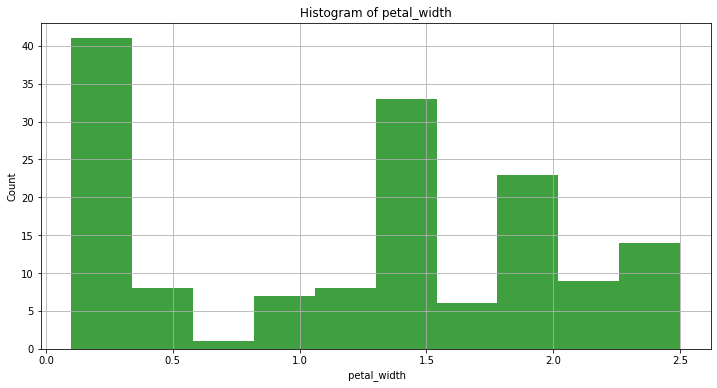

In [8]:
op_2.visualization()

### With Dataframe

In [9]:
df_1 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                   columns=['a', 'b', 'c'])

In [10]:
op_3 = DataOperations(df_1)
op_3.Process()

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [11]:
op_3.descriptive_statistics()

Variable: a, dtype: int32, count: 3, mean: 4.0, std: 3.0, min: 1, Q1: 2.5, median: 4.0, Q3: 5.5, max: 7
Variable: b, dtype: int32, count: 3, mean: 5.0, std: 3.0, min: 2, Q1: 3.5, median: 5.0, Q3: 6.5, max: 8
Variable: c, dtype: int32, count: 3, mean: 6.0, std: 3.0, min: 3, Q1: 4.5, median: 6.0, Q3: 7.5, max: 9


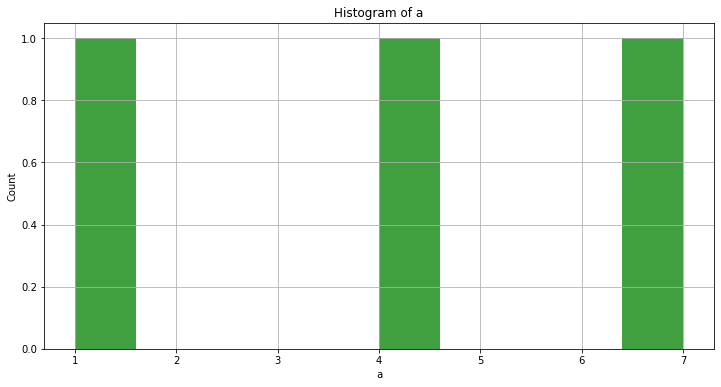

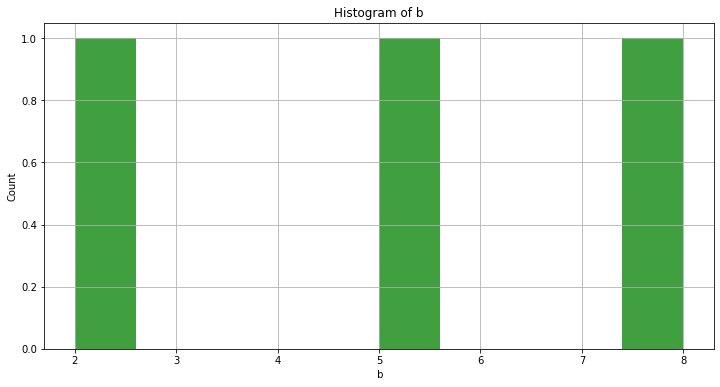

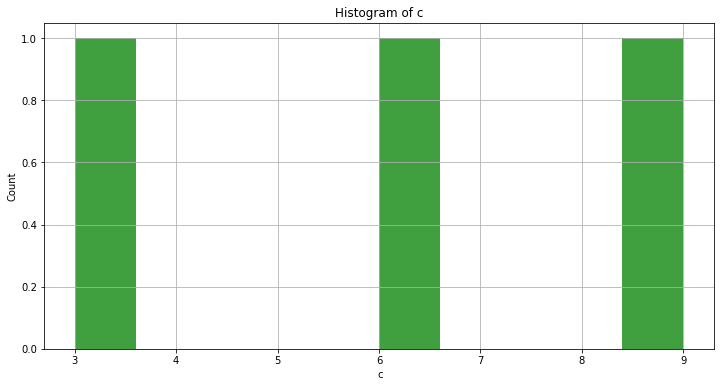

In [12]:
op_3.visualization()

### With (Not given)

In [13]:
op_4 = DataOperations()
op_4.Process()

,a,b,c
0,0.428282,1.056679,1.183857
1,-1.545434,-1.634806,-0.739025
2,0.779632,-0.553309,0.697017
3,-0.147892,0.536339,0.121246
4,-2.191828,-0.587651,-3.343445
5,2.018208,-0.918680,2.486829
6,0.068211,-0.210918,-0.460464
7,-0.675684,0.092352,0.371727
8,-0.163637,0.359163,-1.058372
9,0.924973,0.302260,1.558811


In [14]:
op_4.descriptive_statistics()

Variable: a, dtype: float64, count: 10, mean: 0.07, std: 1.42, min: -2.07, Q1: -0.97, median: -0.18, Q3: 0.89, max: 2.43
Variable: b, dtype: float64, count: 10, mean: 0.42, std: 1.26, min: -1.16, Q1: -0.75, median: 0.5, Q3: 1.19, max: 2.41
Variable: c, dtype: float64, count: 10, mean: 0.14, std: 1.09, min: -1.6, Q1: -0.12, median: 0.17, Q3: 0.61, max: 2.18


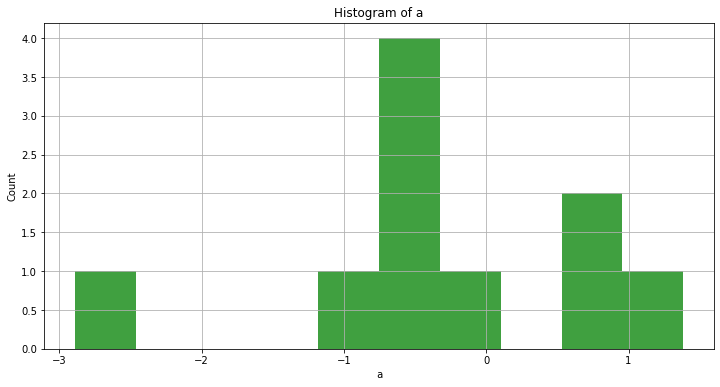

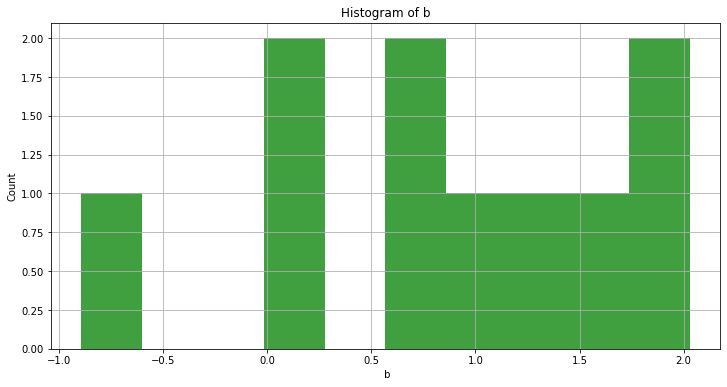

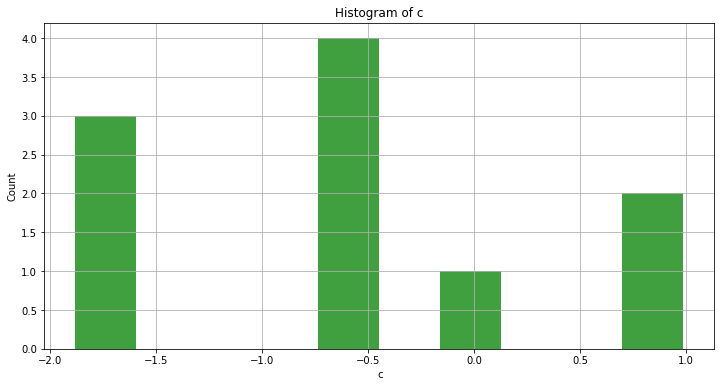

In [15]:
op_4.visualization()